# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mochammad Dzahwan Fadhloly
- **Email:** m.dzahwan@gmail.com
- **ID Dicoding:** dzahwanfdhly

## Menentukan Pertanyaan Bisnis

- Apakah terdapat pola dalam jumlah peminjaman sepeda harian yang dapat diamati berdasarkan jam?
- Apakah ada pola peminjaman sepeda yang berbeda antara hari kerja dan hari libur?
- Bagaimana kondisi cuaca mempengaruhi jumlah peminjaman sepeda harian?

## Import Semua Packages/Library yang Digunakan

Pertama, import semua library yang akan digunakan untuk melakukan analisa dataset ini.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Merupakan proses persiapan data yang meliputi Gathering Data, Assesing Data, Cleaning Data.

### Gathering Data

Yang dilakukan proses ini ialah mengumpulkan data dari sumber, seperti day.csv dan hour.csv serta menggabungkan kedua dataframe menjadi satu dataframe.

In [ ]:
day_df = pd.read_csv('day.csv')
print(day_df.shape)
day_df.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('hour.csv')
print(hour_df.shape)
hour_df.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
data_bikesharing = day_df.merge(hour_df, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
print("Dimensi DataFrame Gabungan:", data_bikesharing.shape)
data_bikesharing.loc[data_bikesharing["dteday"].isnull()]
data_bikesharing.head()

Dimensi DataFrame Gabungan: (17379, 32)


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
print("Jumlah baris di DataFrame Gabungan:", data_bikesharing.shape[0])

Jumlah baris di DataFrame Gabungan: 17379


### Assessing Data

Pada proses ini mengevaluasi struktur dan kualitas data seperti memeriksa tipedata, missing value dan duplicate.

In [71]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
data_bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_daily      17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_daily       17379 non-null  int64  
 3   yr_daily           17379 non-null  int64  
 4   mnth_daily         17379 non-null  int64  
 5   holiday_daily      17379 non-null  int64  
 6   weekday_daily      17379 non-null  int64  
 7   workingday_daily   17379 non-null  int64  
 8   weathersit_daily   17379 non-null  int64  
 9   temp_daily         17379 non-null  float64
 10  atemp_daily        17379 non-null  float64
 11  hum_daily          17379 non-null  float64
 12  windspeed_daily    17379 non-null  float64
 13  casual_daily       17379 non-null  int64  
 14  registered_daily   17379 non-null  int64  
 15  cnt_daily          17379 non-null  int64  
 16  instant_hourly     173

In [ ]:
data_bikesharing.isna().sum()

instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", data_bikesharing.duplicated().sum())
data_bikesharing.describe()

Jumlah duplikasi:  0


,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Pada proses ini, melakukan perubahan tipe data yang belum sesuai dan menghapus kolom yang tidak digunakan.

In [ ]:
data_bikesharing['dteday'] = pd.to_datetime(data_bikesharing['dteday'])

In [ ]:
data_bikesharing = data_bikesharing.drop(columns=['temp_daily', 'temp_hourly', 'atemp_daily', 'atemp_hourly', 'hum_daily', 'hum_hourly'])

In [ ]:
data_bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant_daily      17379 non-null  int64         
 1   dteday             17379 non-null  datetime64[ns]
 2   season_daily       17379 non-null  int64         
 3   yr_daily           17379 non-null  int64         
 4   mnth_daily         17379 non-null  int64         
 5   holiday_daily      17379 non-null  int64         
 6   weekday_daily      17379 non-null  int64         
 7   workingday_daily   17379 non-null  int64         
 8   weathersit_daily   17379 non-null  int64         
 9   windspeed_daily    17379 non-null  float64       
 10  casual_daily       17379 non-null  int64         
 11  registered_daily   17379 non-null  int64         
 12  cnt_daily          17379 non-null  int64         
 13  instant_hourly     17379 non-null  int64         
 14  season

## Exploratory Data Analysis (EDA)

Pada proses exploratory data analysis, yang dilakukan pada dataset untuk memahami karakteristik, pola dan hubungan antar variabel. Tujuannya adalah untuk mendapatkan wawasan yang lebih mendalam tentang data.

### Explore

In [ ]:
data_bikesharing.groupby(by="weathersit_hourly").agg({
    "cnt_hourly": "count",
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()
]}).sort_values(by=("cnt_hourly", "count"), ascending=False)

cnt_hourly windspeed_hourly                             
                       count              max     min      mean <lambda_0>
weathersit_hourly                                                         
1                      11413           0.8060  0.0000  0.190553     0.8060
2                       4544           0.7164  0.0000  0.179973     0.7164
3                       1419           0.8507  0.0000  0.218825     0.8507
4                          3           0.3284  0.0896  0.204000     0.2388

In [ ]:
data_bikesharing.groupby(by="weathersit_daily").agg({
    "cnt_daily": "count",
    "windspeed_daily": ["max", "min", "mean", lambda x: x.max() - x.min()
]}).sort_values(by=("cnt_daily", "count"), ascending=False)

cnt_daily windspeed_daily                               
                     count             max       min      mean <lambda_0>
weathersit_daily                                                         
1                    11040        0.507463  0.022392  0.190219   0.485071
2                     5871        0.414800  0.047275  0.186159   0.367525
3                      468        0.358200  0.097021  0.236641   0.261179

In [ ]:
data_bikesharing.groupby(by="weathersit_daily")["cnt_hourly"].nunique()

weathersit_daily
1    841
2    686
3    187
Name: cnt_hourly, dtype: int64

In [ ]:
data_bikesharing.groupby(by="weathersit_daily")["cnt_daily"].nunique()

weathersit_daily
1    451
2    243
3     21
Name: cnt_daily, dtype: int64

In [ ]:
numerical_columns = ["holiday_daily","weekday_daily","workingday_daily","weathersit_daily", "windspeed_daily", "cnt_daily"]
correlation = data_bikesharing[numerical_columns].corr()
print(correlation)

                  holiday_daily  weekday_daily  workingday_daily  \
holiday_daily          1.000000      -0.102088         -0.252471   
weekday_daily         -0.102088       1.000000          0.035955   
workingday_daily      -0.252471       0.035955          1.000000   
weathersit_daily      -0.033653       0.035082          0.057122   
windspeed_daily        0.006319       0.018226         -0.018746   
cnt_daily             -0.070344       0.064204          0.068216   

                  weathersit_daily  windspeed_daily  cnt_daily  
holiday_daily            -0.033653         0.006319  -0.070344  
weekday_daily             0.035082         0.018226   0.064204  
workingday_daily          0.057122        -0.018746   0.068216  
weathersit_daily          1.000000         0.028187  -0.289650  
windspeed_daily           0.028187         1.000000  -0.231340  
cnt_daily                -0.289650        -0.231340   1.000000  


## Visualization & Explanatory Analysis

Selanjutnya, pada tahap visualization ini merepresentasikan menggunakan grafik dan visualisasi untuk memudahkan dalam menjelaskan pola, tren, dan hubungan dalam data yang sudah di explore sebelumnya serta membantu menjawab pertanyaan bisnis.

### Pertanyaan 1: Apakah terdapat pola dalam jumlah peminjaman sepeda harian yang dapat diamati berdasarkan jam?

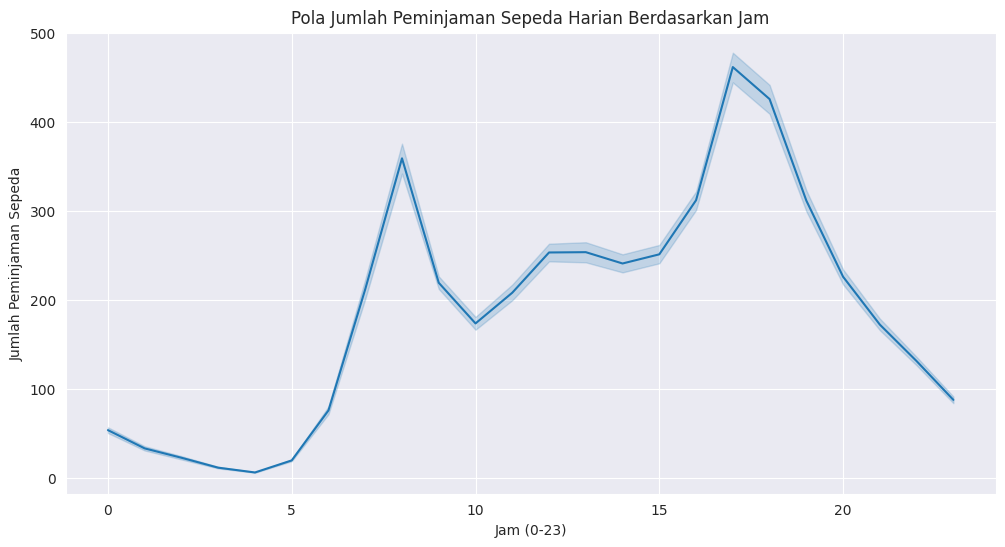

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_bikesharing, x='hr', y='cnt_hourly', estimator='mean')
plt.title('Pola Jumlah Peminjaman Sepeda Harian Berdasarkan Jam')
plt.xlabel('Jam (0-23)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

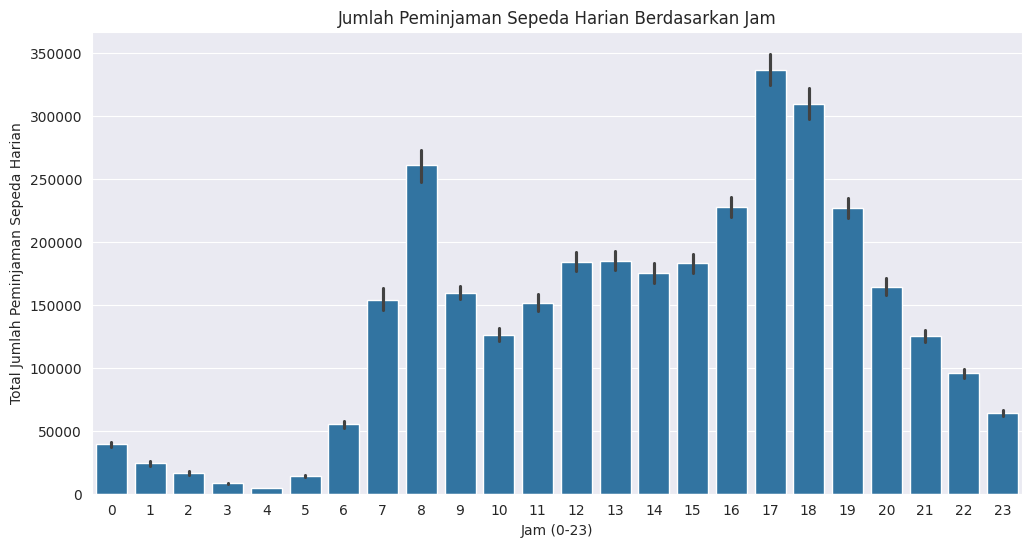

In [72]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data_bikesharing, x='hr', y='cnt_hourly', estimator=sum)
plt.title('Jumlah Peminjaman Sepeda Harian Berdasarkan Jam')
plt.xlabel('Jam (0-23)')
plt.ylabel('Total Jumlah Peminjaman Sepeda Harian')
plt.show()

**Hasil**

Dari kedua visualisasi diatas, peminjaman sepeda harian lebih banyak pada pukul 8 dan juga pukul 17 sampai 18. Sedangkan peminjaman lebih sedikit pada pukul 4 sampai 5.

### Pertanyaan 2: Apakah ada pola peminjaman sepeda yang berbeda antara hari kerja dan hari libur?

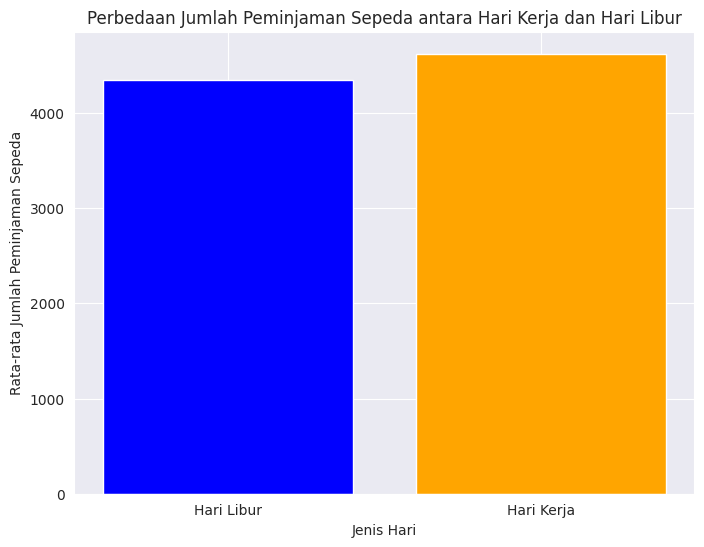

In [73]:
data_sewa = data_bikesharing.groupby('workingday_daily')['cnt_daily'].mean()
labels = ['Hari Libur', 'Hari Kerja']
plt.figure(figsize=(8, 6))
plt.bar(labels, data_sewa, color=['blue', 'orange'])
plt.title('Perbedaan Jumlah Peminjaman Sepeda antara Hari Kerja dan Hari Libur')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.show()

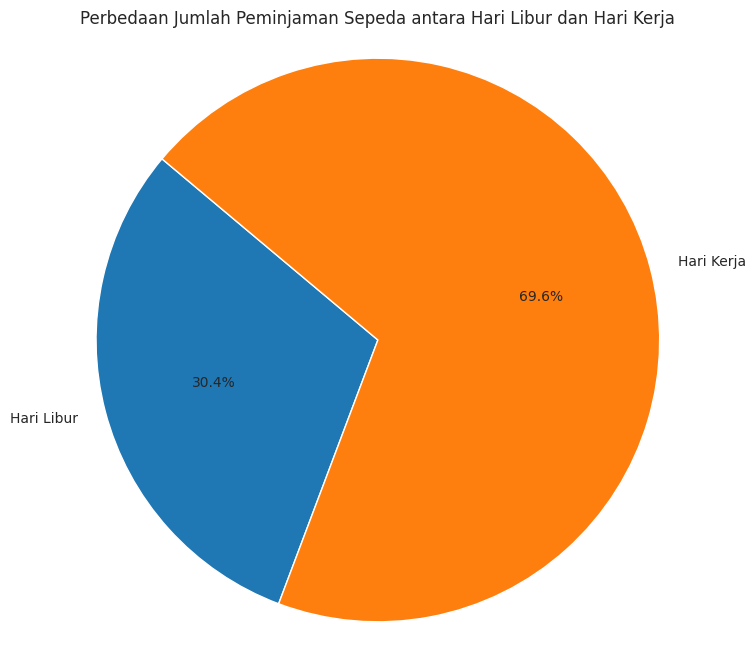

In [ ]:
total = data_bikesharing.groupby('workingday_daily')['cnt_daily'].sum()
labels = ['Hari Libur', 'Hari Kerja']

plt.figure(figsize=(8, 8))
plt.pie(total, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Perbedaan Jumlah Peminjaman Sepeda antara Hari Libur dan Hari Kerja')
plt.axis('equal')
plt.show()

**Hasil**

Dari kedua visualisasi diatas, jumlah peminjaman sepeda lebih banyak pada saat hari kerja daripada saat hari libur.

### Pertanyaan 3: Bagaimana cuaca mempengaruhi jumlah peminjaman sepeda harian?

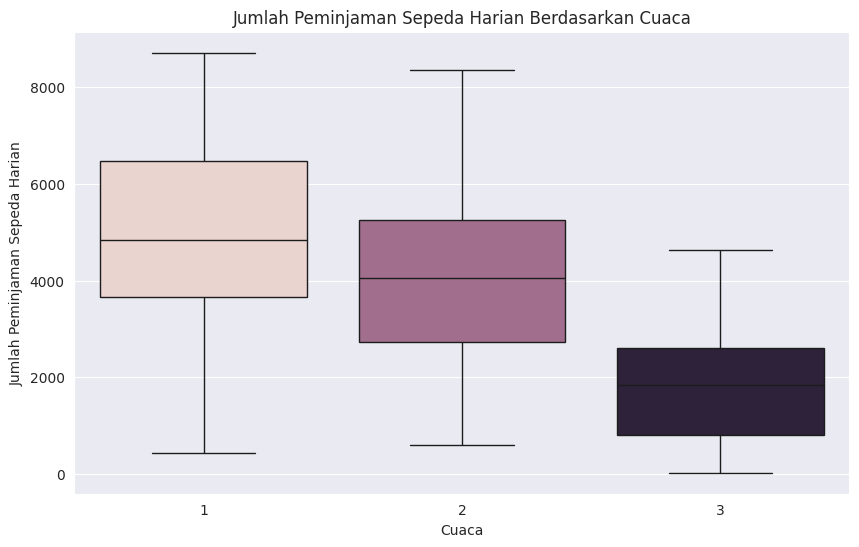

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_bikesharing, x='weathersit_daily', y='cnt_daily', hue='weathersit_daily', legend=False)
plt.title('Jumlah Peminjaman Sepeda Harian Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda Harian')
plt.show()

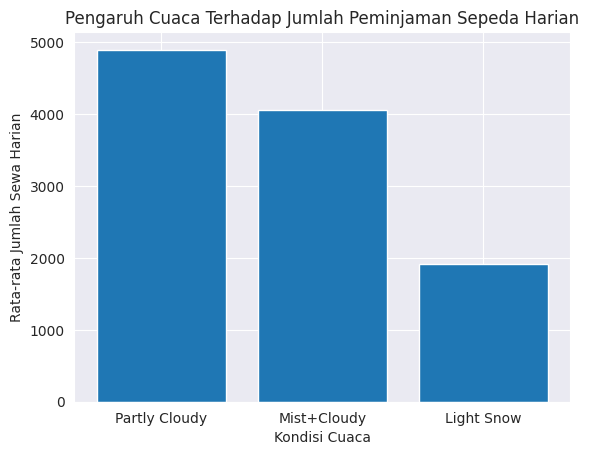

In [74]:
weather_data = data_bikesharing.groupby('weathersit_daily')['cnt_daily'].mean()
weather_names = ['Partly Cloudy', 'Mist+Cloudy', 'Light Snow']
plt.bar(weather_names, weather_data)
plt.title('Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.show()

**Hasil**

Dari kedua visualisasi diatas, pada saat cuaca cerah, sedikit awan, berawan sebagian jumlah peminjaman sepeda harian lebih banyak daripada cuaca lainnya.

## Conclusion

Menyimpulkan hasil proses analisis data sesuai dengan pertanyaan bisnis.

- **Apakah terdapat pola dalam jumlah peminjaman sepeda harian yang dapat diamati berdasarkan jam?**

    Jawab:
    
    Setelah menganalisis dan melihat visualisasi, jumlah peminjaman sepeda harian berdasarkan jam lebih banyak pada pukul 8 dan juga pukul 17 sampai dengan 18, serta jumlah peminjaman lebih sedikit pada pukul 4 sampai dengan 5.
- **Apakah ada pola peminjaman sepeda yang berbeda antara hari kerja dan hari libur?**
    
    Jawab:
    
    Ya, terdapat perbedaan peminjaman sepeda antara hari kerja dan hari libur. Peminjaman di hari kerja lebih banyak sebesar 69.6% dibandingkan dengan peminjaman di hari libur yaitu sebesar 30.4%.

- **Bagaimana cuaca mempengaruhi jumlah peminjaman sepeda harian?**
    
    Jawab:

    Cuaca tentunya berpengaruh terhadap jumlah peminjaman sepeda, hasil analisis dan visualisasi diatas menunjukkan jumlah peminjaman sepeda lebih banyak pada saat kondisi cuaca cerah, sedikit awan dan berawan sebagian.

In [77]:
data_bikesharing.to_csv("main_data.csv", index=False)